# Data from other sources 

### Neuromorpho 

Neuromorpho.org is a jsp website.  
Scrape and download using selenium. 

In [23]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from bs4 import BeautifulSoup as BS
import neuroncollector


In [116]:
scraper = neuroncollector.Scraper(browser="Firefox")

Connected to mongodb://localhost:27017/


In [117]:
scraper.driver.get('http://neuromorpho.org/byspecies.jsp')

In [118]:
scraper.driver.get_screenshot_as_file(filename='sc.png')

True

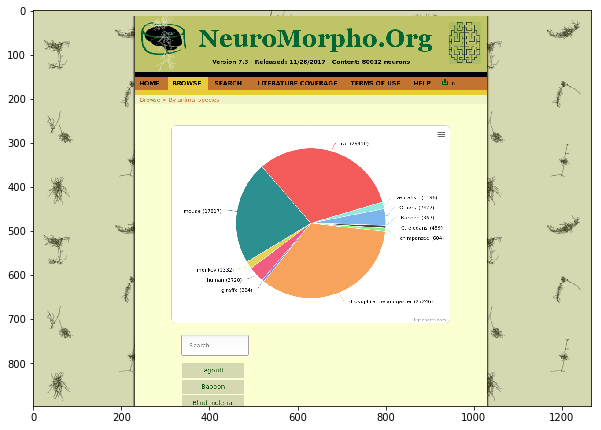

In [119]:
plt.figure(figsize=(10,10))
img=mpimg.imread('sc.png')
imgplot = plt.imshow(img)
plt.show()

In [131]:
species = scraper.driver.find_elements_by_class_name('species')

In [132]:
# Total number of species in neuromorpho database:
len(species)

40

In [133]:
scraper.driver.find_element_by_link_text('mouse')

<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="12ba0657-ed36-4969-ad8c-72c93ef19298", element="2d1cddca-fb99-49f2-8ba4-a4939c6b09d5")>

In [134]:
scraper.driver.find_element_by_link_text('mouse').click()

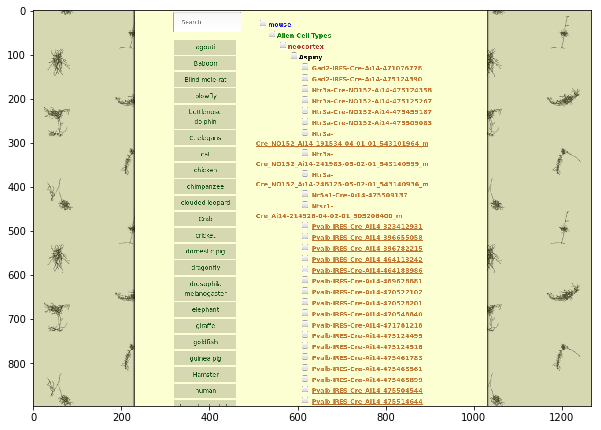

In [136]:
scraper.driver.get_screenshot_as_file(filename='sc.png')
plt.figure(figsize=(10,10))
img=mpimg.imread('sc.png')
imgplot = plt.imshow(img)
plt.show()

In [140]:
lvl2 = scraper.driver.find_elements_by_class_name('lvl2')

In [141]:
len(lvl2)

217

In [142]:
page = scraper.driver.page_source

In [149]:
soup = BS(page, "html.parser")

In [155]:
datasources = soup.findAll("font", {"class": "lvl2"})

In [156]:
[a.text for a in datasources]

['Allen Cell Types',
 'Andolina',
 'Anstoetz',
 'Anton',
 'Arenkiel',
 'Ascoli',
 'Bacci',
 'Bacigaluppi',
 'Badea',
 'Baldwin',
 'Ballester-Rosado',
 'Bannatyne',
 'Barco_Scandaglia',
 'Bartos',
 'Bastian',
 'Baulac',
 'Beguin',
 'Bleckert',
 'Brager',
 'Branchereau_Cattaert',
 'Brecha',
 'Briggman',
 'Brumberg',
 'Brunjes',
 'Burdakov',
 'Burkhalter',
 'Caille',
 'Calabresi',
 'Capogna',
 'Caviedes',
 'Chalupa',
 'Chandrashekar',
 'Chen_SK',
 'Cho',
 'Danzer',
 'De Bartolo',
 'De Schutter',
 'DeFelipe',
 'Del Negro',
 'DeMunter',
 'Denk',
 'Diaz',
 'Diniz',
 'Dragich',
 'Duque-Tahvildari',
 'Dusart',
 'Dwyer',
 'Feldmeyer',
 'Fisher',
 'Flores',
 'Frankland',
 'Fricker',
 'Fukunaga',
 'Fulton',
 'Gage',
 'Gartner-Alpar',
 'Gerber',
 'Ginty',
 'Gonzalez-Burgos',
 'Grasselli',
 'Groh',
 'Gupton_Song',
 'Guthrie',
 'Hajos',
 'Halnes',
 'Heistek_Mansvelder',
 'Higgs',
 'Hioki',
 'Huang',
 'Huberman',
 'Huebener',
 'Hwang',
 'Imai',
 'Johnson_T',
 'Jongbloets',
 'Kameda_Kaneko',
 'Kanatso

In [158]:
brain_region = soup.findAll("font", {"class": "lvl3"})

In [159]:
set([a.text for a in brain_region])

{'Not reported',
 'Olfactory Bulb',
 'accessory olfactory bulb',
 'amygdala',
 'anterior olfactory nucleus',
 'basal ganglia',
 'brainstem',
 'cerebellum',
 'dorsal thalamus',
 'entorhinal cortex',
 'hippocampus',
 'hypothalamus',
 'main olfactory bulb',
 'myelencephalon',
 'neocortex',
 'peripheral nervous system',
 'retina',
 'spinal cord',
 'subiculum',
 'thalamus',
 'ventral striatum',
 'ventral thalamus'}

In [164]:
cell_types = soup.findAll("font", {"class": "lvl4"})

In [165]:
set([a.text for a in cell_types])

{'Aspiny',
 'Back-Projecting',
 'Cajal-Retzius',
 'Cannabinoid receptor (CB1R)-positive',
 'Chandelier',
 'Excitatory',
 'Fast-spiking',
 'GABAergic',
 'GAD65-expressing',
 'Golgi',
 'HICAP',
 'HIPP',
 'Induced Neurons',
 'Inhibitory',
 'Lugaro',
 'MOPP',
 'Martinotti',
 'Motoneuron',
 'Muscarinic-responsive',
 'Neuroblast',
 'Neuropeptide Y (NPY)-positive',
 'Non-glutamatergic',
 'Not reported',
 'Oligodendrocyte',
 'Parvalbumin (PV)-positive',
 'Pseudounipolar',
 'Purkinje',
 'Pyramidal-like',
 'Regulator of calcineurin 2 (Rcan2)-postive',
 'Renshaw',
 'Schaffer-collateral associated',
 'Serotonin receptor type 3A (5-HT3)-positive',
 'Somatostatin (SOM) containing cell',
 'Somatostatin (SOM)-positive',
 'Spiny',
 'Total molecular layer projecting',
 'Trilaminar',
 'Vasoactive Intestinal Peptide (VIP)-positive',
 'amacrine',
 'astrocyte',
 'axonless',
 'basket',
 'bipolar',
 'bistratified',
 'bitufted',
 'deep projecting cell',
 'deep short axon',
 'dendritic targeting',
 'dopaminergi

In [171]:
neurons = soup.findAll("a", {"class": "screenshot"})

In [172]:
# Number of neurons
len(neurons)

17817

In [ ]:
# Todo: For each data source, click on checkbox and download


In [115]:
scraper.driver.close()